In [1]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import astropy.units as u
from photutils.centroids import centroid_com
from photutils import CircularAperture, CircularAnnulus,aperture_photometry
from photutils.detection import DAOStarFinder
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from photutils.utils import calc_total_error
from astropy.stats import sigma_clip
from astropy.table import Table
import pandas as pd
import uncertainties
from matplotlib.colors import LogNorm
from scipy.interpolate import UnivariateSpline
from astropy.stats import sigma_clipped_stats
from photutils.centroids import centroid_sources
import astroalign as aa

import photometry_functions as pf

In [2]:
# Define path
d = 'C:/Users/Tim/Downloads/535 Data/'

C:/Users/Tim/Downloads/535 Data/spec_standards\groupb_stds-0001_SZ.fit


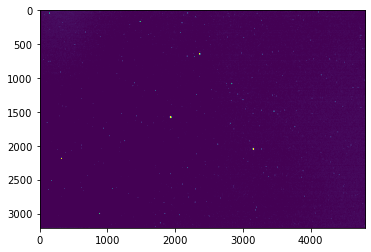

C:/Users/Tim/Downloads/535 Data/spec_standards\groupb_stds-0002_SZ.fit


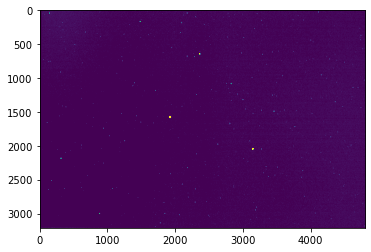

C:/Users/Tim/Downloads/535 Data/spec_standards\groupb_stds-0003_SZ.fit


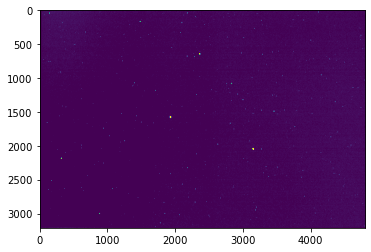

In [19]:
#Define Filter
filter='SZ'
files = glob.glob(d+'spec_standards/*{}*.fit*'.format(filter))


for i in files:
    # Open file
    image = fits.open(i)
    header = image[0].header
    print(i)
    # Get data
    data = image[0].data
    # Plot tjhe data
    plt.imshow(data,vmin=np.median(data),vmax=np.median(data)+100)
    plt.show()

In [20]:
median_image,header0 = pf.median_combine(files)

3 files to be stacked


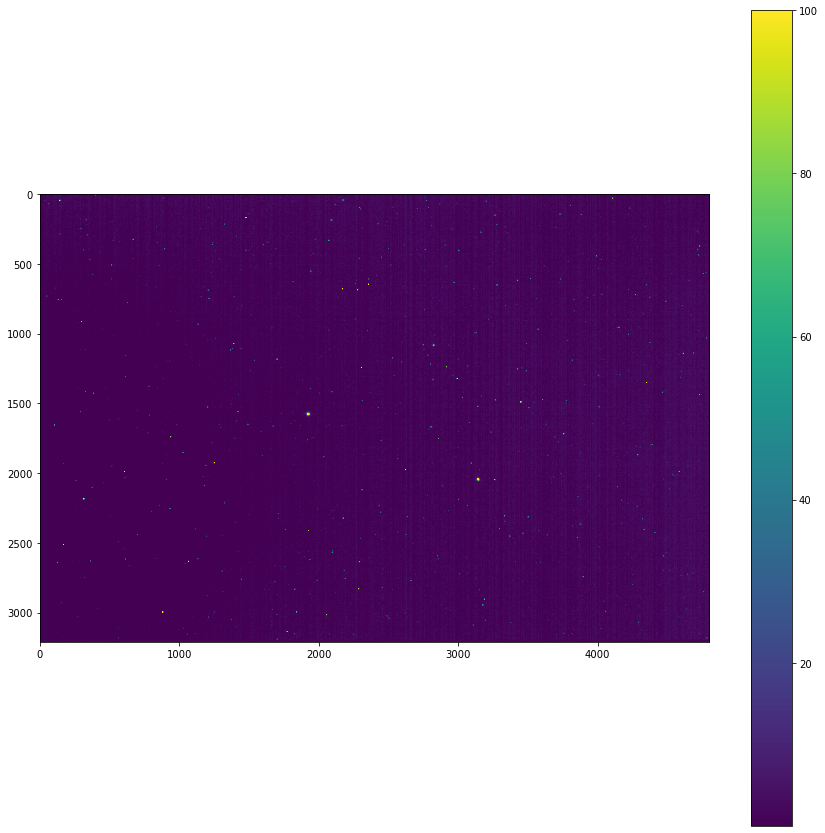

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(median_image,vmin=np.median(median_image),vmax=np.median(median_image)+100)
plt.colorbar()
plt.show()

In [22]:
fits.writeto('C:/Users/Tim/Downloads/median_spec_{}.fits'.format(filter),median_image,header = header0,overwrite=True)